In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [75]:
# ===============================
# STEP 1: Load the dataset
# ===============================
df = pd.read_csv("../data/raw_data.csv")

print("\n🔹 STEP 1: Dataset Loaded")
print("Shape:", df.shape)
display(df.head(5))  # show first 5 rows


🔹 STEP 1: Dataset Loaded
Shape: (2000, 29)


,Company_ID,Industry_Type,Company_Size,Location_Region,Total_Waste_Generated_kg_per_month,Biodegradable_Waste_%,Recyclable_Waste_%,Hazardous_Waste_%,Waste_Segregation_Level_%,Decomposition_Technique,...,Methane_Emissions_tons_per_year,Water_Pollution_Index,Soil_Pollution_Index,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,CSR_Initiatives_on_Waste,Public_Sustainability_Reports,Perfect_Waste_Decomposition_System
0,C0640,Pharma,Medium,Rural,17332.66,42,48,10,67,Mixed,...,28.83,2,25,Yes,Yes,11,86,Yes,Yes,1
1,C1460,Textile,Medium,Rural,15774.52,20,40,40,70,Landfill,...,253.86,97,82,Yes,Yes,4,30,Yes,Yes,0
2,C1839,Food,Small,Rural,3487.97,45,35,20,57,Composting,...,226.16,99,56,No,Yes,4,17,No,No,0
3,C1646,Automobile,Small,Semi-Urban,520.20,12,51,37,70,Incineration,...,138.41,50,82,Yes,No,4,24,Yes,Yes,0
4,C0149,Food,Small,Rural,1861.76,62,37,1,83,Anaerobic Digestion,...,20.16,20,3,Yes,Yes,11,68,Yes,Yes,1


In [76]:
# ===============================
# STEP 2: Handle Missing Values
# ===============================
print("\n🔹 STEP 2: Checking Missing Values")
print(df.isnull().sum())


🔹 STEP 2: Checking Missing Values
Company_ID                               0
Industry_Type                            0
Company_Size                             0
Location_Region                          0
Total_Waste_Generated_kg_per_month       0
Biodegradable_Waste_%                    0
Recyclable_Waste_%                       0
Hazardous_Waste_%                        0
Waste_Segregation_Level_%                0
Decomposition_Technique                  0
Decomposition_Efficiency_%               0
Recycling_Rate_%                         0
Hazardous_Waste_Treatment_Compliance     0
Waste_to_Energy_Usage                    0
ISO_14001_Certified                      0
Zero_Waste_Landfill_Certified            0
Govt_Compliance_Status                   0
Environmental_Fines_Count                0
CO2_Emissions_tons_per_year              0
Methane_Emissions_tons_per_year          0
Water_Pollution_Index                    0
Soil_Pollution_Index                     0
Employee_Training_i

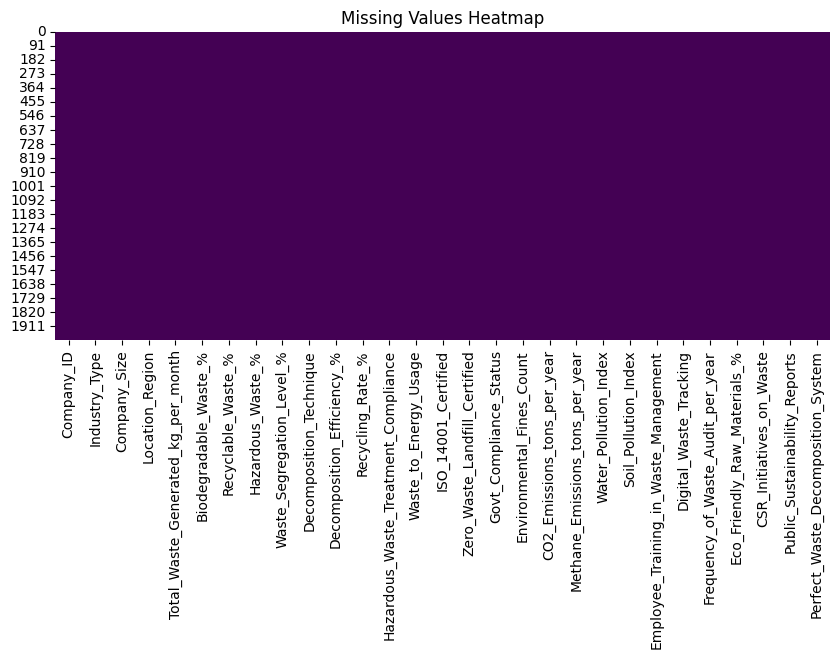

In [77]:
# Visualize missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [78]:
# Fill missing values
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("✅ Missing values handled")
print("Shape after filling NAs:", df.shape)

✅ Missing values handled
Shape after filling NAs: (2000, 29)


In [79]:
# ===============================
# STEP 3: Encode Categorical Columns
# ===============================
print("\n🔹 STEP 3: Encoding Categorical Columns")

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print("✅ Categorical columns encoded")
print("Shape after encoding:", df.shape)


🔹 STEP 3: Encoding Categorical Columns
✅ Categorical columns encoded
Shape after encoding: (2000, 29)



🔹 STEP 4: Scaling Numerical Features
✅ Numerical features scaled
Shape after scaling: (2000, 29)


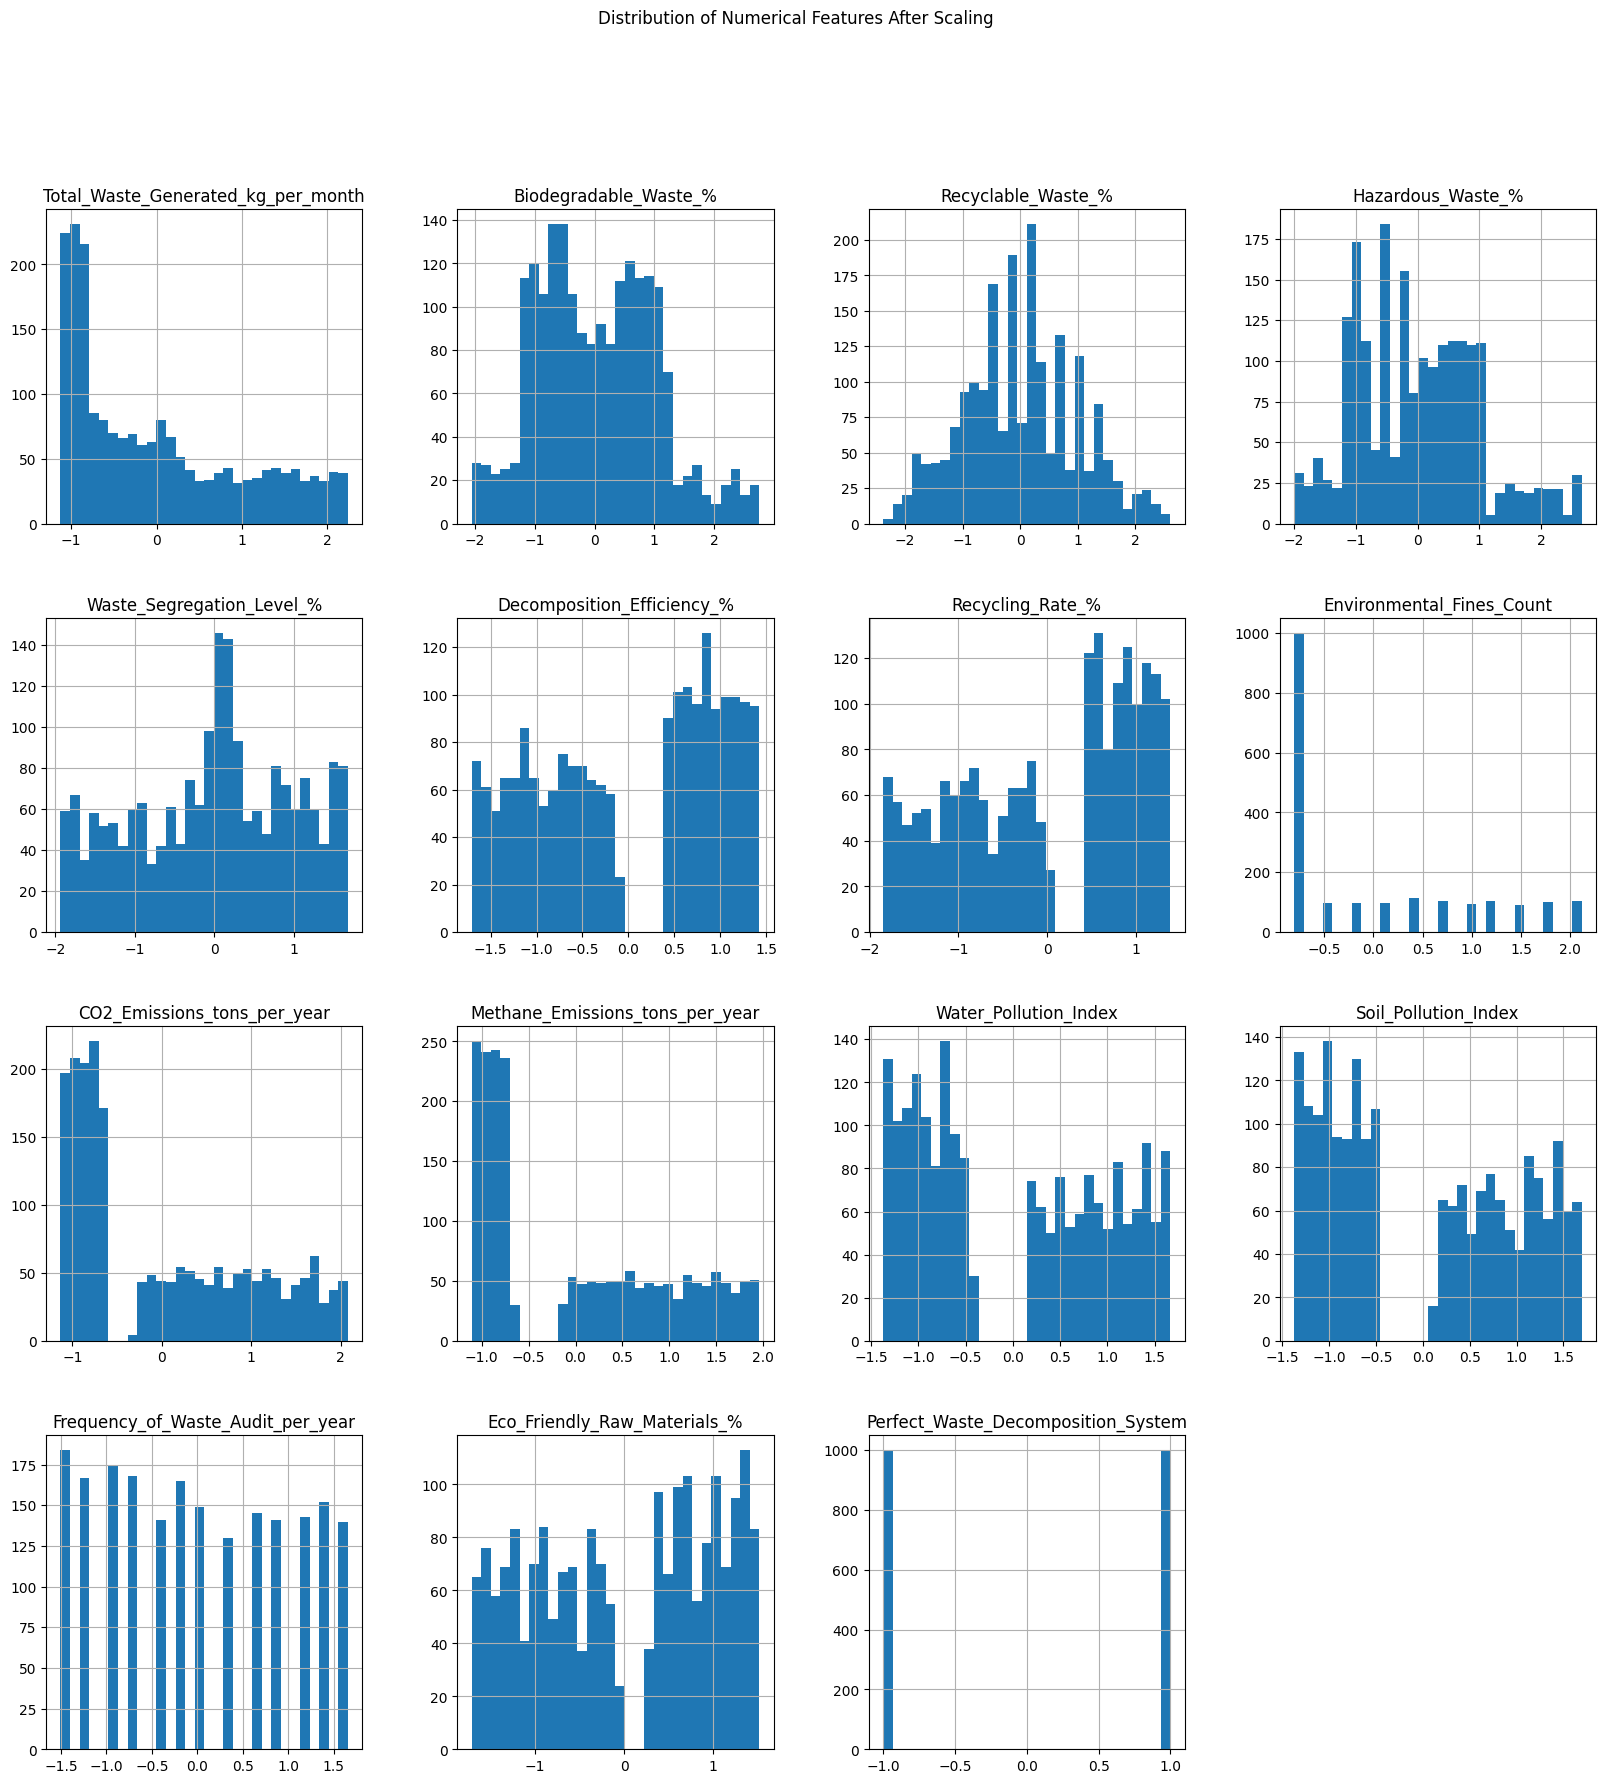

In [80]:
# ===============================
# STEP 4: Scale Numerical Features
# ===============================
print("\n🔹 STEP 4: Scaling Numerical Features")

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Numerical features scaled")
print("Shape after scaling:", df.shape)

# Show histogram after scaling
df[num_cols].hist(bins=30, figsize=(20, 20))
plt.suptitle("Distribution of Numerical Features After Scaling")
plt.show()


🔹 STEP 5: Applying PCA for Dimensionality Reduction


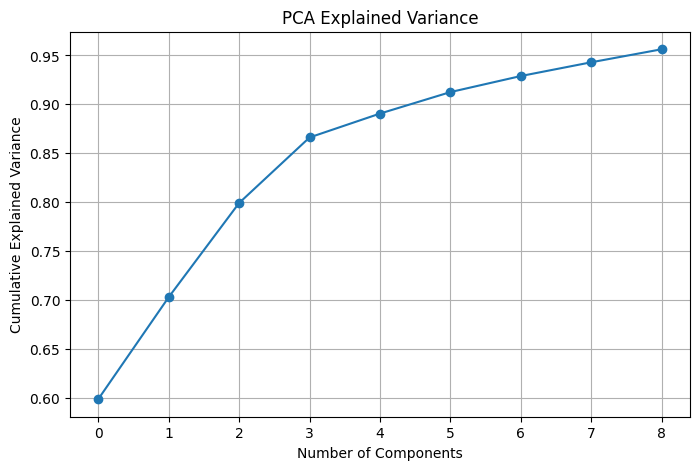

✅ PCA applied
Shape after PCA: (2000, 23)


,Company_ID,Industry_Type,Company_Size,Location_Region,Decomposition_Technique,Hazardous_Waste_Treatment_Compliance,Waste_to_Energy_Usage,ISO_14001_Certified,Zero_Waste_Landfill_Certified,Govt_Compliance_Status,...,Public_Sustainability_Reports,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,639,5,1,0,4,1,1,1,1,0,...,1,3.175859,-1.429759,0.581611,0.029443,-0.600881,0.415973,0.219005,-0.168083,0.239766
1,1459,6,1,0,3,0,0,0,1,1,...,1,-2.440614,1.588739,0.583855,-0.137799,0.442619,-1.495630,-0.232588,-1.390988,0.234086
2,1838,2,2,0,1,0,1,1,1,2,...,0,-3.657506,-0.741810,-0.609468,-0.995925,0.874019,0.507436,0.025062,-0.848335,-0.515339
3,1645,0,2,1,2,1,1,1,1,1,...,1,-2.267786,1.588531,1.668356,-1.217775,0.739438,-0.613002,1.192356,0.712858,-0.303187
4,148,2,2,0,0,1,1,1,1,0,...,1,3.236881,-2.683388,-0.952299,-1.040071,-0.058018,0.063486,0.246870,-0.360180,-0.151592


In [81]:
# ===============================
# STEP 5: Apply PCA for Redundancy Reduction
# ===============================
print("\n🔹 STEP 5: Applying PCA for Dimensionality Reduction")

pca = PCA(n_components=0.95)  # keep 95% variance
pca_features = pca.fit_transform(df[num_cols])

# Variance explained plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

# Replace numerical columns with PCA features
pca_cols = [f"PCA_{i+1}" for i in range(pca_features.shape[1])]
df_pca = pd.DataFrame(pca_features, columns=pca_cols)

df = df.drop(columns=num_cols).reset_index(drop=True)
df = pd.concat([df, df_pca], axis=1)

print("✅ PCA applied")
print("Shape after PCA:", df.shape)
display(df.head(5))

In [82]:
# ===============================
# STEP 6: Save Preprocessed Dataset
# ===============================
df.to_csv("../data/preprocessed_dataset.csv", index=False)
print("\n💾 Preprocessed dataset saved as 'preprocessed_dataset.csv'")


💾 Preprocessed dataset saved as 'preprocessed_dataset.csv'


In [83]:
# ===============================
# STEP 7: Train-Test Split
# ===============================
print("\n🔹 STEP 7: Splitting into Train/Test Sets")

# Assuming last column is target (adjust as per your dataset)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("✅ Data split complete")
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


🔹 STEP 7: Splitting into Train/Test Sets
✅ Data split complete
Train set shape: (1600, 22) (1600,)
Test set shape: (400, 22) (400,)
